                                            Observations
                                            
                                            
1.Capomulin had the most trial counts while Propriva had the least trial counts.

2.The amount of male vs female mice was nearly identical.

3.Capomulin was the most effective at reducing tumor growth.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
miceamount = len(combined["Mouse ID"].value_counts())
print(f"Amount of Mice: {miceamount}")

Amount of Mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dupmouse = combined.loc[combined.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupmouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupdata = combined[combined["Mouse ID"] == "g989"]
dupdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = combined[combined["Mouse ID"].isin(dupmouse) == False]

In [6]:
# Checking the number of mice in the clean DataFrame.
miceamount = len(cleaned["Mouse ID"].value_counts())
print(f"Amount of Mice: {miceamount}")

Amount of Mice: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std = cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean of Tumor Volume":mean,
                        "Median of Tumor Volume":median, 
                        "Variance of Tumor Volume":variance, 
                        "Standard Deviation of Tumor Volume":std,
                        "SEM of Tumor Volume":sem})

summary




,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = cleaned.loc[:, ["Drug Regimen","Tumor Volume (mm3)"]]
agg = stats.groupby("Drug Regimen").agg([np.mean,np.median,np.var,np.std,st.sem])
# Using the aggregation method, produce the same summary statistics in a single line

agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

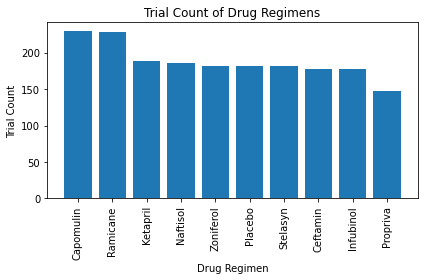

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugcount = cleaned["Drug Regimen"].value_counts()

plt.bar(drugcount.index, drugcount, align="center")
plt.xticks(rotation="vertical")

plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.title("Trial Count of Drug Regimens")

plt.tight_layout()

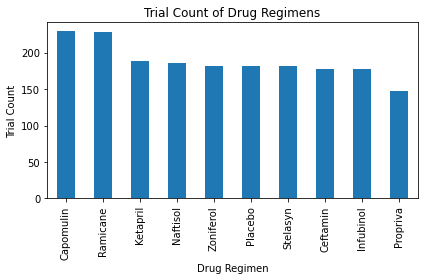

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugcount.plot(kind="bar")

plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.title("Trial Count of Drug Regimens")

plt.tight_layout()

Male      125
Female    123
Name: Sex, dtype: int64

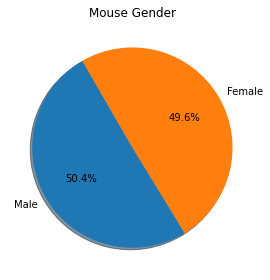

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mousesex = cleaned.loc[:, ["Mouse ID", "Sex"]]
mousesex = mousesex.drop_duplicates()
gendertotal = mousesex["Sex"].value_counts()
labels = mousesex["Sex"].unique()

plt.pie(gendertotal, labels=labels,autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Mouse Gender")
plt.tight_layout()
gendertotal

Male      125
Female    123
Name: Sex, dtype: int64

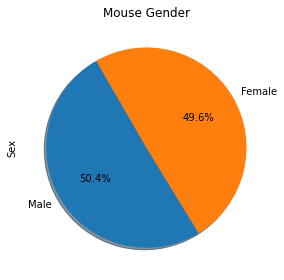

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gendertotal.plot.pie(autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Mouse Gender")
plt.tight_layout()
gendertotal

## Quartiles, Outliers and Boxplots

In [13]:
# Find max timepoint for each mouse
max_tp_df = pd.DataFrame(cleaned.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge max timepoint onto data_df
merged_df = pd.merge(cleaned, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
drug_values = []

for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # final time points
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # final tumor volumes
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # IQR
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'{drug} IQR: {iqr}')
    
    # upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'{drug} Lower Bound: {lower_bound}')
    print(f'{drug} Upper Bound: {upper_bound}')
    
    # outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'{drug} Outliers: {outliers_count}')

Capomulin IQR: 7.781863460000004
Capomulin Lower Bound: 20.70456164999999
Capomulin Upper Bound: 51.83201549
Capomulin Outliers: 0
Ceftamin IQR: 15.577752179999997
Ceftamin Lower Bound: 25.355449580000002
Ceftamin Upper Bound: 87.66645829999999
Ceftamin Outliers: 0
Infubinol IQR: 11.477135160000003
Infubinol Lower Bound: 36.83290494999999
Infubinol Upper Bound: 82.74144559000001
Infubinol Outliers: 1
Ramicane IQR: 9.098536719999998
Ramicane Lower Bound: 17.912664470000003
Ramicane Upper Bound: 54.30681135
Ramicane Outliers: 0


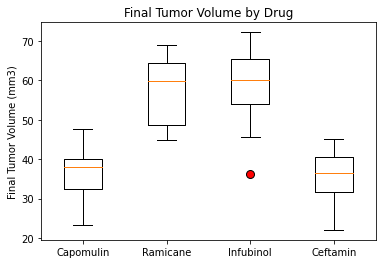

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(drug_values, flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

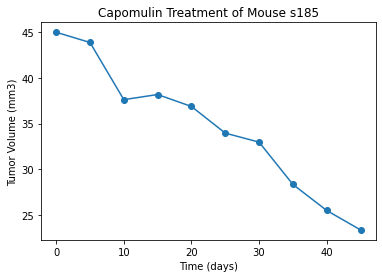

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse = cleaned.loc[cleaned['Mouse ID'] == 's185']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()



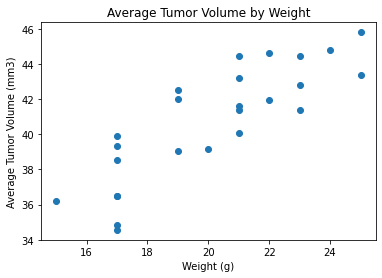

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = cleaned.loc[cleaned['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()

## Correlation and Regression

Capomulin correlation for weight and average tumor volume: 0.84.


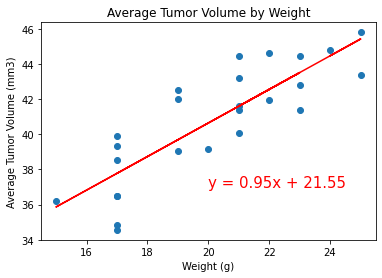

In [18]:
# Calculate the correlation coefficient and linear regression model 

capomulin_df = cleaned.loc[cleaned['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)

print(f"""Capomulin correlation for weight and average tumor volume: {round(correlation[0],2)}.""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()